### Volatility modelling


Motivations:

- Many relationships in real life are non-linear


#### Testing for ’ARCH effects’ in exchange rate returns


We will test for ’ARCH effects’ in exchange rates using the currrencies dataset.

First, we want to compute the (Engle, 1982) test for ARCH effects to make sure that this class of
models is appropriate for the data.

We will employ returns on daily exchange rates where there are 7,141 observations. Models of this kind are inevitably more data intensive than those based on simple linear regressions, and hence, everything else being equal, they work better when the data are sampled daily rather than at a lower frequency.


In [1]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas as pd
import numpy as np
from arch import arch_model

In [2]:
data = pd.read_excel("currencies.xls", index_col=[0])
data.head()

,EUR,GBP,JPY
Date,,,
1998-12-14,0.846806,0.593014,116.600
1998-12-15,0.849082,0.595344,115.920
1998-12-16,0.850526,0.596641,116.100
1998-12-17,0.848249,0.594495,115.145
1998-12-18,0.850146,0.594477,116.225


In [3]:
def LogDiff(x):
    x_diff = 100 * np.log(x / x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff


data = pd.DataFrame(
    {
        "reur": LogDiff(data["EUR"]),
        "rgbp": LogDiff(data["GBP"]),
        "rjpy": LogDiff(data["JPY"]),
    }
)

In [4]:
data.head()

,reur,rgbp,rjpy
Date,,,
1998-12-15,0.268414,0.392138,-0.584898
1998-12-16,0.169922,0.217620,0.155159
1998-12-17,-0.268076,-0.360329,-0.825969
1998-12-18,0.223387,-0.003028,0.933576
1998-12-19,-0.181074,-0.109905,-0.474343


A test for the presence of ARCH in the residuals is calculated by regressing the squared residuals
on a constant and p lags, where p is set by the user. As an example, assume that p is set to five.


The first step is to estimate a linear model so that the residuals can be tested for ARCH.

In Jupyter, we perform these tests by fitting a constant-only model based on an OLS regression and testing for ARCH effects using **Engle’s Lagrange multiplier test**.

To do so we generate a set of new variables (the lagged values of ’rgbp’ from one period to five periods).

An OLS regression instance is then constructed by regressing ’rgbp’ on its own lagged value plus a constant term.

Finally, we obtain the residual series by typing the command results.resid.


In [5]:
data1 = sm.add_constant(data["rgbp"])
results = sm.OLS(data1["rgbp"], data1["const"]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   rgbp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 14 Apr 2024   Prob (F-statistic):                nan
Time:                        13:42:28   Log-Likelihood:                -3952.8
No. Observations:                7141   AIC:                             7908.
Df Residuals:                    7140   BIC:                             7914.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.005      0.695      0.4

To test for ARCH effects in the residuals, we import the function het_arch from statsmodels.stats.diagnostic. In the input brackets, we only need to feed the residual series and specify the list of lag orders as five.

As can be seen from the test output, the Engle test is based on the null hypothesis
that there are no ARCH effects against the alternative hypothesis that the data is characterised by
(in our case) ARCH(5) disturbances.


In [6]:
res = het_arch(results.resid, nlags=5)
name = ["lm", "lmpval", "fval", "fpval"]
lzip(name, res)

[('lm', 252.99550035191953),
 ('lmpval', 1.2512748060621372e-52),
 ('fval', 52.41484057148052),
 ('fpval', 1.4008125355502632e-53)]

The test shows a p-value of 0.0000, which is well below 0.05, suggesting the presence of ARCH effects
in the pound-dollar returns.


### Estimating GARCH models


To estimate a GARCH-type model in Python, we select the arch_model function from arch.

In the function inputs, we define Dependent variable: rjpy.

We do not include any further independent variables but instead continue by specifying the main model specification.

Let us first determine the type of volatility model. In this case, we set the argument as vol=’GARCH’.

This means that the model would include one "a" and one "b"term (i.e., one lag of the squared errors and one lag of the conditional variance, respectively).

Meanwhile, it is good to clarify that the maximum lags with respect to the ARCH and GARCH terms is one by default, which corresponds to the p and q parameters.


In [7]:
# The default set of options produces a model with a constant mean,
# GARCH(1,1) conditional variance and normal errors.

In [8]:
am = arch_model(data["rjpy"], vol="GARCH")
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3585742.3059731596
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5838.787361101432
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4492.952539646019
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5816.288635015353
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4379.836122583049
Iteration:      6,   Func. Count:     40,   Neg. LLF: 15789.913253183258
Iteration:      7,   Func. Count:     48,   Neg. LLF: 5815.802785859072
Iteration:      8,   Func. Count:     54,   Neg. LLF: 22878323.097213034
Iteration:      9,   Func. Count:     60,   Neg. LLF: 6964.391009883598
Iteration:     10,   Func. Count:     66,   Neg. LLF: 4361.4542448739685
Iteration:     11,   Func. Count:     72,   Neg. LLF: 6071.771853503712
Iteration:     12,   Func. Count:     80,   Neg. LLF: 4352.233849179657
Iteration:     13,   Func. Count:     86,   Neg. LLF: 4340.771894016353
Iteration:     14,   Func. Count:     91,   Neg. LLF: 4340.7

The **arch_model** provides various options regarding how to vary the model. You can examine the
parameters by looking through the documentation.

The **vol argument** can be used to choose the type of **volatility modelling**, while the argument **dist** provides different options for the **assumed distribution of the errors**, e.g., instead of applying a Normal distribution (default setting) we can specify a Student’s t-distribution.


The coefficients on both the lagged squared residuals and lagged conditional variance terms in
the conditional variance equation are **highly statistically significant**.

Also, as is typical of GARCH model estimates for financial asset returns data, the sum of the coefficients on the lagged squared error and lagged conditional variance is very close to unity (approximately 0.99).

This implies that **shocks to the conditional variance will be highly persistent**.

This can be seen by considering the equations for forecasting future values of the conditional variance using a GARCH model.

A large sum of these coefficients will imply that a large positive or a large negative return will lead future forecasts of the variance to be high for a protracted period.

The individual conditional variance coefficients are also as one would expect. The variance intercept term omega in the ’ARCH’ panel is very small, and the ’ARCH’-parameter ’alpha[1]’ is around 0.04 while the coefficient on the lagged conditional variance ’beta[1]’ is larger, at 0.96.


### GJR and EGARCH models


Since the GARCH model was developed, numerous extensions and variants have been proposed.
In this section we will estimate two of them in Python, the GJR and EGARCH models.

The **GJR model** is a simple extension of the GARCH model with an additional term added to account for possible asymmetries.

**The exponential GARCH (EGARCH)** model extends the classical GARCH by correcting the non-negativity constraint and by allowing for asymmetries.


We start by estimating the EGARCH model.

To do so, we need to change the argument **vol=’GARCH’ to vol=’EGARCH’** for the arch_model inputs, while keeping other parameters unchanged.

Moreover, we are now asked to provide the **maximum number of lags for the asymmetric innovation** because the function initialises with only one arch and one grach term.

To start with, we choose o=1 to resemble the previous classic GARCH model.


In [9]:
# E-GARCH
am = arch_model(data["rjpy"], vol="EGARCH", o=1)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 51537.248186139
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1.817453870048294e+16
Iteration:      3,   Func. Count:     33,   Neg. LLF: 1468479768056.421
Iteration:      4,   Func. Count:     43,   Neg. LLF: 49720.98400744908
Iteration:      5,   Func. Count:     53,   Neg. LLF: 4508.644344025128
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4367.305148077641
Iteration:      7,   Func. Count:     67,   Neg. LLF: 5217933714137.122
Iteration:      8,   Func. Count:     77,   Neg. LLF: 4320.947051194505
Iteration:      9,   Func. Count:     83,   Neg. LLF: 4320.6564362837835
Iteration:     10,   Func. Count:     89,   Neg. LLF: 4320.641204668894
Iteration:     11,   Func. Count:     95,   Neg. LLF: 4320.63981852905
Iteration:     12,   Func. Count:    101,   Neg. LLF: 4320.6397419636405
Iteration:     13,   Func. Count:    107,   Neg. LLF: 4320.63964154679
Iteration:     14,   Func. Count:    113,   Neg. LLF: 4320.639

Looking at the results, we find that all EARCH and EGARCH terms are statistically significant except
the constant.

The EARCH terms represent the influence of news – **lagged innovations** – in the Nelson
(1991) EGARCH model.

The term ’gamma[1]’ captures the following:

$ \frac{\mu*{t-1}}{\sqrt{\sigma^2*{t-1}}}$ (The ARCH effects)


and ’alpha[1]’ captures:


$ \frac{|\mu*{t-1}|}{\sqrt{\sigma^2*{t-1}}} - \sqrt{\frac{2}{\pi}}$ an asymmetric
effect (in other words, the size effect)


It is evident that the positive estimate on the asymmetric effect

**implies that negative shocks result in a higher next-period conditional variance than positive shocks of the same sign**.

The result for the EGARCH asymmetry term is consistent with what would have
been expected in the case of the application of a GARCH model to a set of stock returns.

Indeed, both the leverage effect and volatility effect explanations for asymmetries in the context of stocks apply here.

For a positive return shock, the results suggest **more yen per dollar** and therefore a strengthening
dollar and a weakening yen.

Thus, the EGARCH results suggest that a strengthening dollar (weakening yen) leads to lower next-period volatility than when the yen strengthens by the same amount.


In [10]:
# GJR-GARCH
am = arch_model(data["rjpy"], p=1, o=1, q=1, vol="GARCH")
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 118573.40678238607
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2159169838.0309715
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7531.518382142648
Iteration:      4,   Func. Count:     35,   Neg. LLF: 229755.857192207
Iteration:      5,   Func. Count:     42,   Neg. LLF: 4717.342891534625
Iteration:      6,   Func. Count:     49,   Neg. LLF: 12979.092771142656


Iteration:      7,   Func. Count:     56,   Neg. LLF: 20997.692913203755
Iteration:      8,   Func. Count:     63,   Neg. LLF: 4381.043238059461
Iteration:      9,   Func. Count:     70,   Neg. LLF: 4422.66711829763
Iteration:     10,   Func. Count:     77,   Neg. LLF: 4362.001870487843
Iteration:     11,   Func. Count:     84,   Neg. LLF: 4352.449095570316
Iteration:     12,   Func. Count:     92,   Neg. LLF: 4333.313171404034
Iteration:     13,   Func. Count:     99,   Neg. LLF: 4326.540977067739
Iteration:     14,   Func. Count:    105,   Neg. LLF: 4326.5362904660105
Iteration:     15,   Func. Count:    111,   Neg. LLF: 4326.535882557653
Iteration:     16,   Func. Count:    117,   Neg. LLF: 4326.535853903818
Iteration:     17,   Func. Count:    122,   Neg. LLF: 4326.5358539025865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4326.535853903818
            Iterations: 17
            Function evaluations: 122
            Gradient evaluations:

Let us now test a GJR model. For this, we come back to the original set-up: the volatility model
vol=’GARCH’.

In the GJR inputs, we specify 1 ARCH maximum lag, 1 TARCH maximum lag and 1 GARCH maximum lag.


Similar to the EGARCH model, we find that all of the ARCH, TARCH and GARCH terms are
statistically significant.

The ’gamma[1]’ term captures the $\mu_{t-1}I_{t-1} $ term where $I_{t-1}=1$ if $\mu_{t-1} < 0 $
and $I_{t-1}=0$ otherwise. We find a positive coefficient estimate on the ’gamma[1]’ term, which is
again consistent with what we would expect to find according to the **leverage effect explanation** if we were modelling stock return volatilities.


### Forecasting from GARCH models


GARCH-type models can be used to forecast volatility.

Let us assume that we want to generate forecasts based on the GARCH model estimated earlier for the forecast period 03 Aug 2016 to 03 Jul 2018.

The first step is to re-estimate the GARCH model for the subsample running until 02 Aug 2016.

To estimate the model, we input the same specifications as previously, i.e., the ’rjpy’ series from
the ’currencies’ workfile.

However, now we only want to estimate the model for a subperiod of the data so we slice the DataFrame and generate two new series data_in_the_sample and data_out_of_the_sample, respectively, using the built-in function loc with break date ’2016-08-02’.


In [11]:
# Sampling
data_in_the_sample = data.loc[:"2016-08-02", "rjpy"]
data_out_of_the_sample = data.loc["2016-08-03":, "rjpy"]

We can either create **static (a series of rolling single-step-ahead) forecasts or dynamic
(multiple-step-ahead) forecasts**.


Let us start with the static forecasts.

To begin with, a GARCH model instance am is constructed.

Given that static forecasting is the type where the prediction always uses previous actual observations, a for loop is created to construct a rolling one-step horizon for out-of-the-sample forecasts.

Specifically, we take each index datetime individually from data_out_of_the_sample and generate a
GARCH result instance res based on the subsample until that date. For example, if the index datetime
is ’2016-08-03’, the sample data for GARCH result starts from ’1998-12-15’ to ’2016-08-03’. The
one-step ahead forecasts subsequently set out after the ending date (i.e., ’2016-08-03’).

Likewise, the forecasts will start from ’2016-08-04’ if the index datetime is ’2016-08-04’, and so on.

Note that we input ’2016-08-03’ as the first date in the argument last_obs = date because the arch_model does not include the last observation in the volatility modelling process.


In [16]:
am = arch_model(data["rjpy"], vol="Garch")

In [18]:
data

,reur,rgbp,rjpy
Date,,,
1998-12-15,0.268414,0.392138,-0.584898
1998-12-16,0.169922,0.217620,0.155159
1998-12-17,-0.268076,-0.360329,-0.825969
1998-12-18,0.223387,-0.003028,0.933576
1998-12-19,-0.181074,-0.109905,-0.474343
...,...,...,...
2018-06-29,-0.703435,-0.479584,0.327927
2018-06-30,-0.298654,-0.414118,0.012012
2018-07-01,0.011449,0.005547,0.001161


In [19]:
data["rjpy"]

Date
1998-12-15   -0.584898
1998-12-16    0.155159
1998-12-17   -0.825969
1998-12-18    0.933576
1998-12-19   -0.474343
                ...   
2018-06-29    0.327927
2018-06-30    0.012012
2018-07-01    0.001161
2018-07-02    0.113410
2018-07-03   -0.060765
Name: rjpy, Length: 7141, dtype: float64

In [17]:
cvar_rjpy_stat = {}
for date in data_out_of_the_sample.index:
    res = am.fit(last_obs=date, disp="off")
    forecasts = res.forecast(horizon=1)
    forecasts_res = forecasts.variance.dropna()
    cvar_rjpy_stat[date] = forecasts_res.iloc[1]

cvar_rjpy_stat = pd.DataFrame(cvar_rjpy_stat).T

To access the one-step forecasting value of each GARCH specification, we type the command
forecasts = res.forecast(horizon=1).

Finally, we keep the value by the command cvar_rjpy_stat[date] = forecasts_res.iloc[1].

Once the loop completes, the static forecasts can be seen in the dictionary cvar_rjpy_stat, which later converts to a DataFrame for better presentation.


In [20]:
res = am.fit(last_obs="2016-08-03", disp="off")
forecasts = res.forecast(horizon=len(data_out_of_the_sample))
forecasts_res = forecasts.variance.dropna()

cvar_rjpy_dyn = pd.DataFrame(
    data=forecasts_res.iloc[1].values,
    columns=["dynamic forecasting"],
    index=data_out_of_the_sample.index,
)

On the other hand, it is relatively easy to obtain **dynamic forecasts**. By definition, we generate
a GARCH result that ends on ’2016-08-02’ and perform a multiple-step prediction.

This can be achieved by the command **forecasts = res.forecast(horizon=len(data_out_of_the_sample))**. We then create a new variable cvar_rjpy_dyn to save the series.


Finally we want to graphically examine the conditional variance forecasts.

To generate a time-series graph of the static and dynamic forecasts, we create a figure object 1 and plot two series with their own labels. We can also set up x, y label and legend options.


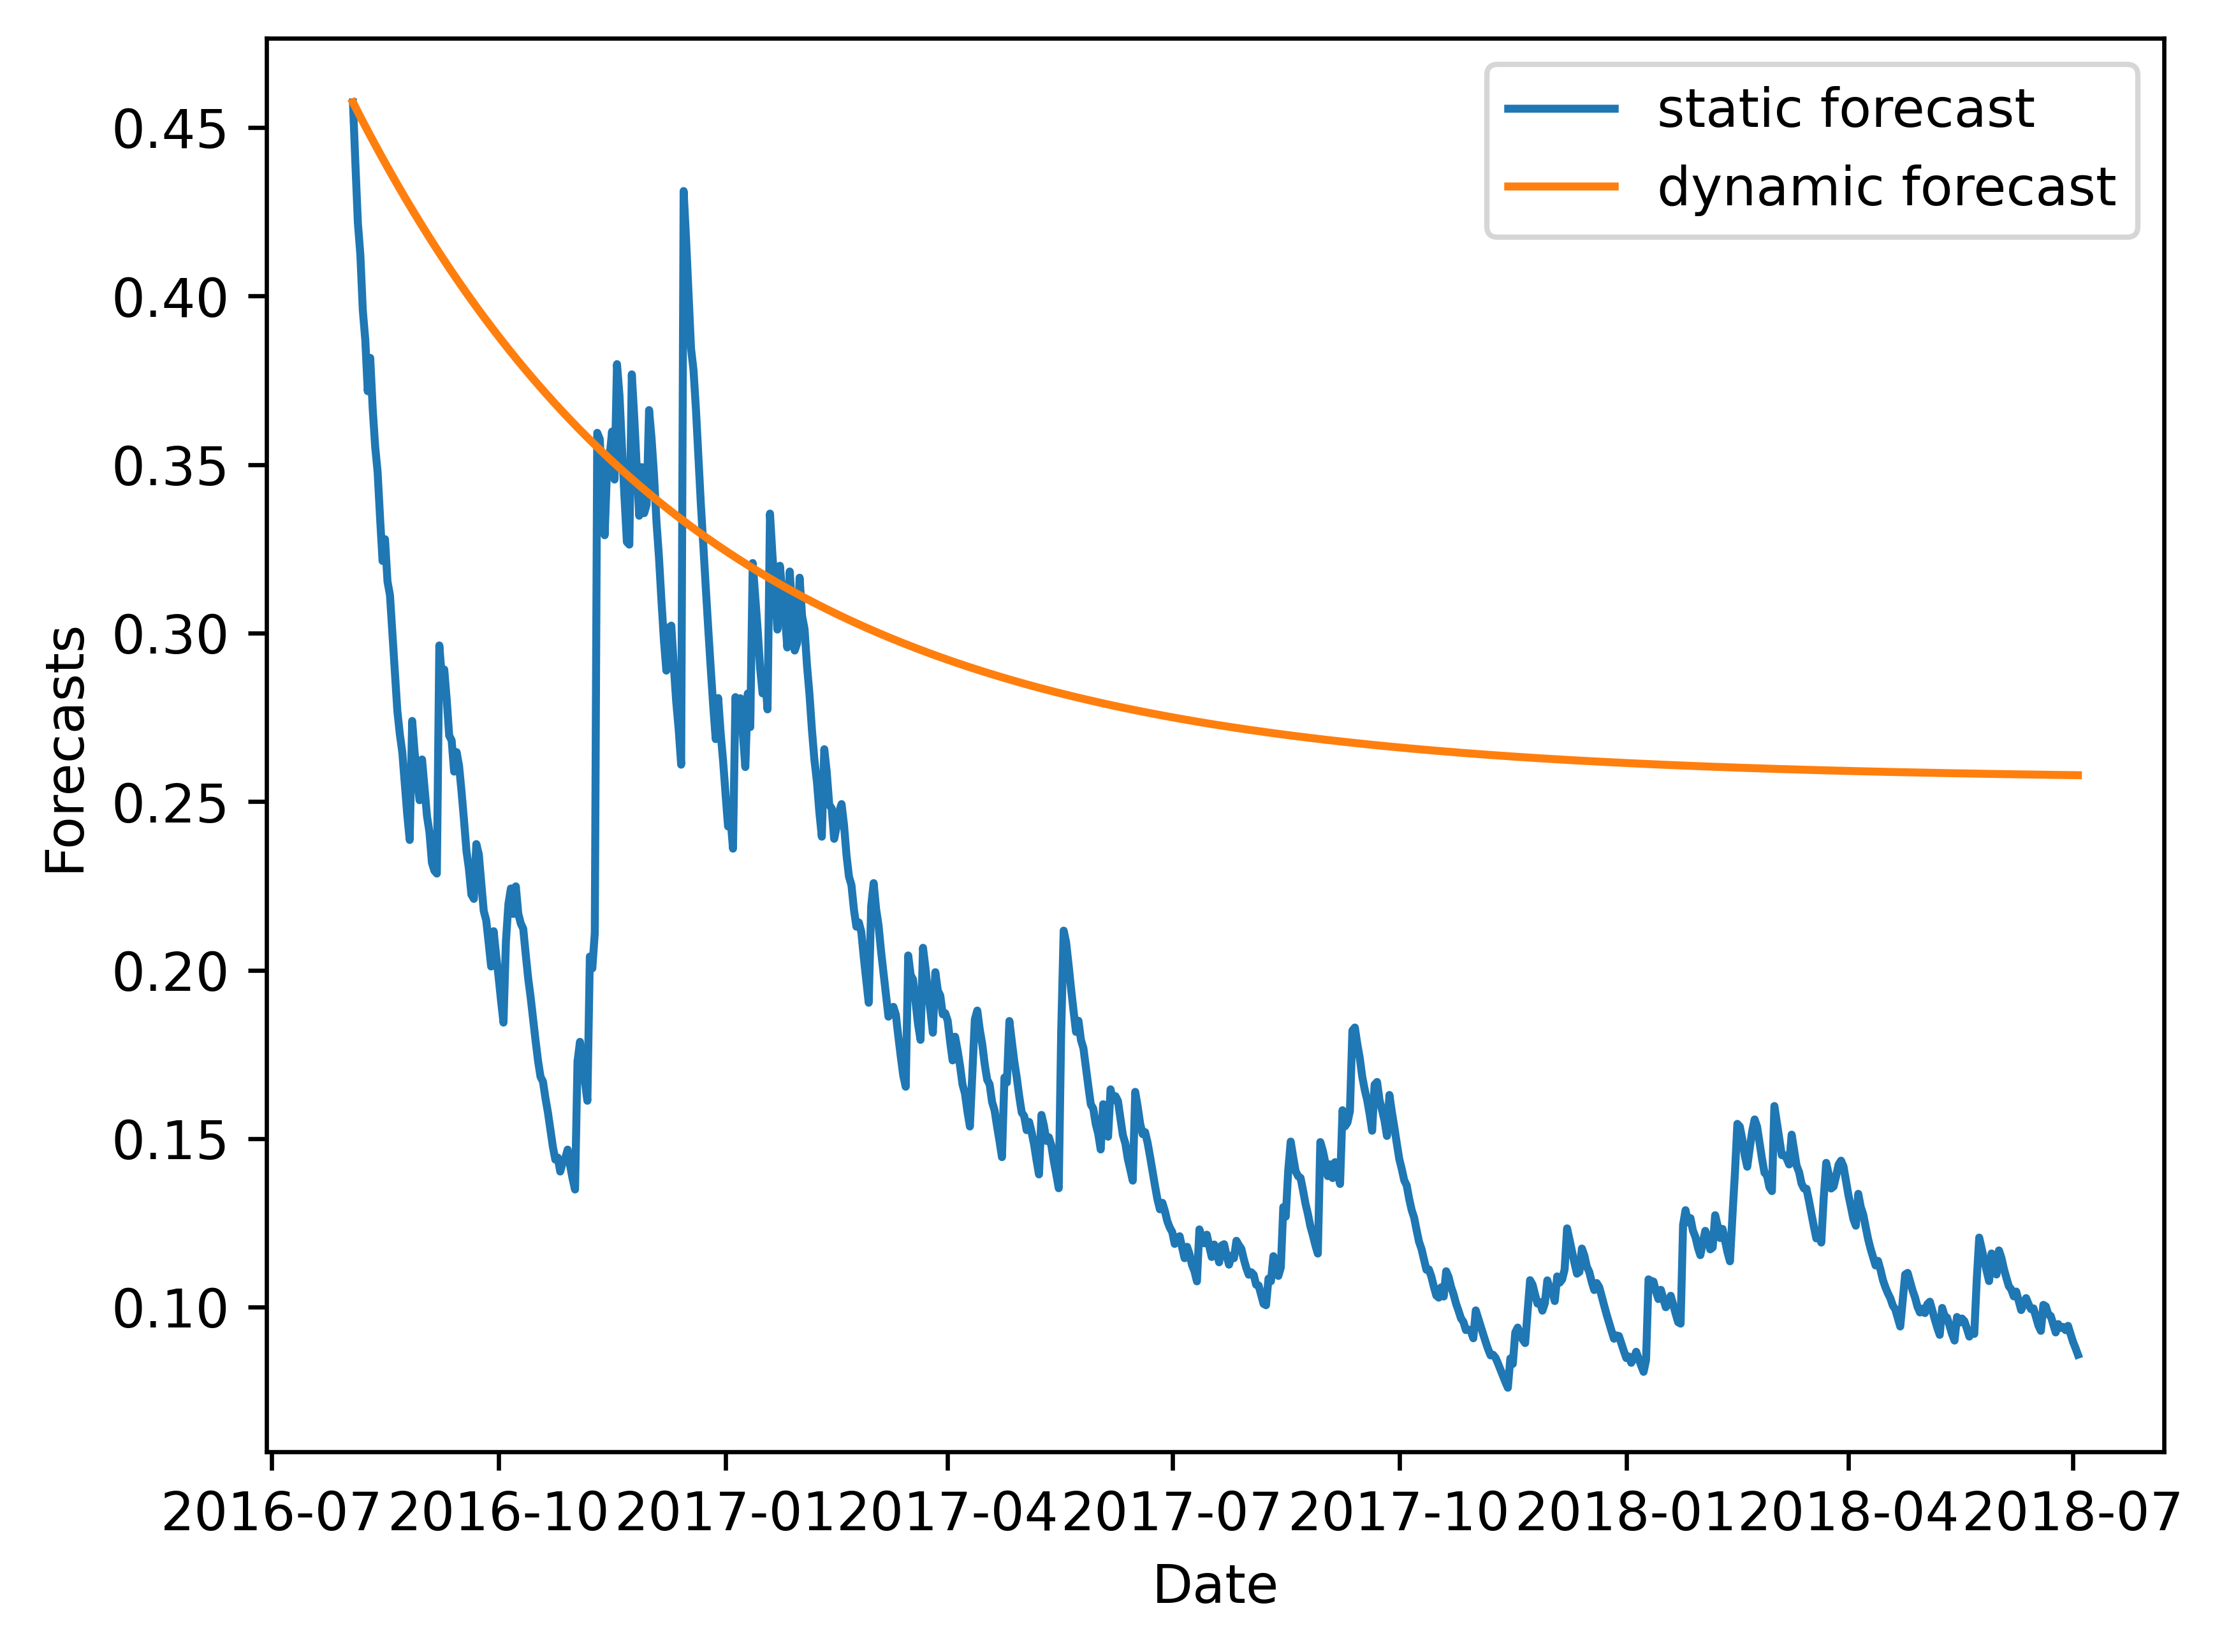

In [21]:
plt.figure(1, dpi=600)
plt.plot(cvar_rjpy_stat, label="static forecast")
plt.plot(cvar_rjpy_dyn, label="dynamic forecast")

plt.xlabel("Date")
plt.ylabel("Forecasts")
plt.legend()
plt.show()

What do we observe? For the dynamic forecasts, the forecasts converge upon their long-term mean value from below as the forecast horizon increases.

Turning to the static forecasts (blue line), it is evident that the variance forecasts have one
large spike in early 2017. After a period of relatively high conditional variances in the first half of 2017, the values stabilise and enter a phase of historically quite low variance in the second half of 2017.

2018 sees a large rise in the conditional variances and they remain at a relatively high level for
the rest of the sample period.

Since in the case of the static forecasts we are looking at a series of
rolling one-step ahead forecasts for the conditional variance, the values show much more volatility
than those for the dynamic forecasts.
